In [1]:
import numpy as np
from os import listdir
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from os import listdir
import matplotlib.patches as mpatches
from scipy import signal
from scipy.stats import chi2
import gsw
import geopy.distance
import signalz
import scipy
from scipy import signal
from scipy.interpolate import interp1d
from scipy.interpolate import BarycentricInterpolator
import math
import jmkxarray


In [2]:
path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/good_files/'


walle2019_jul = ['walle2019_jul_EW.nc', 'walle2019_jul_WE.nc']
walle2019_dec = [ 'walle2019_dec_EW.nc','walle2019_dec_WE.nc']
walle2021 = ['walle2021_EW.nc', 'walle2021_WE.nc']
rosie2022 = ['rosie2022_EW.nc','rosie2022_WE.nc']
rosie2023=['rosie2023_EW.nc', 'rosie2023_WE.nc']
walle2023= ['walle2023_EW.nc', 'walle2023_WE.nc']

########## 

file_correct_location = '/Users/Lauryn/THESIS/CPROOF_Work/Files/corrected_location/'


walle2019_jul_grid = ['walle2019_jul_EW_corrected_dist.nc', 'walle2019_jul_WE_corrected_dist.nc']
walle2019_dec_grid = [ 'walle2019_dec_EW_corrected_dist.nc.nc','walle2019_dec_WE_corrected_dist.nc']
walle2021_grid = ['walle2021_EW_corrected_dist.nc', 'walle2021_WE_corrected_dist.nc']
rosie2022_grid = ['rosie2022_EW_corrected_dist.nc','rosie2022_WE_corrected_dist.nc']
rosie2023_grid=['rosie2023_EW_corrected_dist.nc', 'rosie2023_WE_corrected_dist.nc']
walle2023_grid= ['walle2023_EW_corrected_dist.nc', 'walle2023_WE_corrected_dist.nc']

transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/PSD/'


In [3]:
climate = '/Users/Lauryn/THESIS/CPROOF_Work/Climatology/LineP_climatology_1956to2012.nc'  

with xr.open_dataset(climate) as climate:
    display(climate)
    
    #find distance from Station 1
    climate['distance'] =[geopy.distance.geodesic((48.56127328, -125.53143223), (climate.latitude[i],climate.longitude[i])).km for i in range(len(climate.longitude))]


<xarray.Dataset> Size: 20MB
Dimensions:              (charsInName: 3, stations: 27, dim1: 12, dim2: 860)
Dimensions without coordinates: charsInName, stations, dim1, dim2
Data variables: (12/14)
    LinePstationNames    (charsInName, stations) |S1 81B ...
    longitude            (stations) float64 216B ...
    latitude             (stations) float64 216B ...
    month                (dim1) float64 96B ...
    pressure             (dim2) float64 7kB ...
    temperature          (stations, dim2, dim1) float64 2MB ...
    ...                   ...
    salinity             (stations, dim2, dim1) float64 2MB ...
    salinity_std         (stations, dim2, dim1) float64 2MB ...
    salinity_noYears     (stations, dim2, dim1) float64 2MB ...
    density              (stations, dim2, dim1) float64 2MB ...
    density_std          (stations, dim2, dim1) float64 2MB ...
    density_noYears      (stations, dim2, dim1) float64 2MB ...
Attributes:
    description:             Monthly climatology of temperature, salinity and...
    Additional Information:  DFO Line P monitoring website: https://www.water...
    creation_date:           14-Nov-2024 13:30:17
    created_by:              tetjana.ross@dfo-mpo.gc.ca

# Walle 2024

In [5]:
path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/fine_grid/'
file_correct_location = '/Users/Lauryn/THESIS/CPROOF_Work/Files/corrected_location/'


walle2024_EW =  xr.open_dataset(path+'walle2024_EW.nc')  
walle2024_EW_grid =  xr.open_dataset(file_correct_location+'walle2024_EW_corrected_dist.nc')  

In [7]:
fine_spectra_walle2024_EW = np.empty((1100, 426, 1000))
fine_spectra_walle2024_EW[:] = np.nan

for m in range(0,1000):
    print(m)
    #step 1: make white noise 
    white_noise_walle2024_EW = xr.DataArray(np.random.randn(1100,int(((1421.1-121.5)*1000/100))), dims=('depth','time')) 
    distance_noise_grid_walle2024_EW = xr.DataArray(np.linspace(121.5, 1421.1, int(((1421.1-121.5)*1000/100))), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


    #step 2: make red noise
    red_noise = np.empty((1100,int(((1421.1-121.5)*1000/100))))
    red_noise[:,:] = np.nan

    for i in range(0,1100):
        red_noise[i] = np.cumsum(white_noise_walle2024_EW[i])

    # step 3: Welch method the finely gridded noise
    one_iteration_spectra = np.empty((1100, 426))
    one_iteration_spectra[:] = np.nan

    for j in range(0,1100):
        r_noise = red_noise[j]
        r_noise = r_noise[~np.isnan(r_noise)]
        if len(r_noise)> 0: 
            evenly_spaced_grid = np.arange(0,climate.distance[-1],0.25) ##spaced 0.25 km apart

            r_noise = np.interp(evenly_spaced_grid, distance_noise_grid_walle2024_EW[j], r_noise)

            k_fine, psd_fine = signal.welch(r_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)

            one_iteration_spectra[j, :] = psd_fine

    fine_spectra_walle2024_EW[:,:,m] = one_iteration_spectra
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
## average the fine spectra 
fine_spectra_walle2024_EW = xr.DataArray(fine_spectra_walle2024_EW, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2024_EW  = fine_spectra_walle2024_EW.mean(dim='iteration')


In [10]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2024_EW_grid

for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2024_EW = np.random.randn(1100, 12996)

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2024_EW, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, 700), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2024_EW[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2024_EW[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2024_EW_grid.depth
average_transfer['k'] = k_even_grid[1::]

#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2024_EW_transfer_functions.nc')


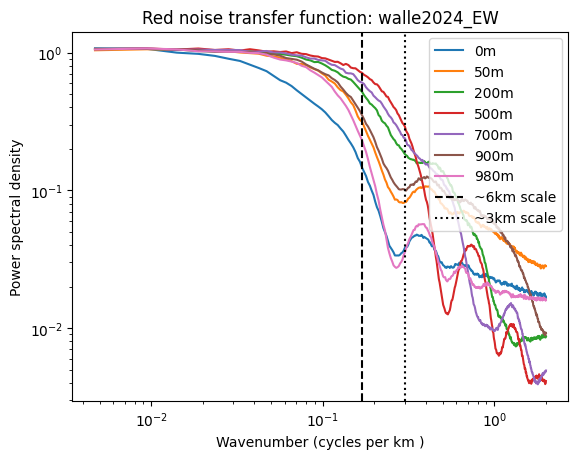

In [12]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2024_EW_transfer_functions = xr.open_dataset(transfer_path+ 'walle2024_EW_transfer_functions.nc')

levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(walle2024_EW_transfer_functions.k, walle2024_EW_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: walle2024_EW')


 
plt.axvline(x=1.7e-1, c='black', label="~6km scale", ls='--')
plt.axvline(x=3e-1, c='black', label="~3km scale", ls=':')

axs.legend(loc='upper right')


WE

In [ ]:

walle2024_WE =  xr.open_dataset(path+'walle2024_WE.nc')  
walle2024_WE_grid =  xr.open_dataset(file_correct_location+'walle2024_WE_corrected_dist.nc')  

In [ ]:
fine_spectra_walle2024_WE = np.empty((1100, 85, 1000))
fine_spectra_walle2024_WE[:] = np.nan

for m in range(0,1000):
    print(m)
    #step 1: make white noise 
    white_noise_walle2024_WE = xr.DataArray(np.random.randn(1100,int(((1421.1-121.5)*1000/100))), dims=('depth','time')) 
    distance_noise_grid_walle2024_WE = xr.DataArray(np.linspace(121.5, 1421.1, int(((1421.1-121.5)*1000/100))), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


    #step 2: make red noise
    red_noise = np.empty((1100,int(((1421.1-121.5)*1000/100))))
    red_noise[:,:] = np.nan

    for i in range(0,1100):
        red_noise[i] = np.cumsum(white_noise_walle2024_WE[i])

    # step 3: Welch method the finely gridded noise
    one_iteration_spectra = np.empty((1100, 85))
    one_iteration_spectra[:] = np.nan

    for j in range(0,1100):
        r_noise = red_noise[j]
        r_noise = r_noise[~np.isnan(r_noise)]
        if len(r_noise)> 0: 
            evenly_spaced_grid = np.arange(0,climate.distance[-1],0.25) ##spaced 0.25 km apart

            r_noise = np.interp(evenly_spaced_grid, distance_noise_grid_rosie2024_WE[j], r_noise)

            k_fine, psd_fine = signal.welch(r_noise, fs=1/0.25, window='hann', nperseg=169, noverlap=169 // 2)

            one_iteration_spectra[j, :] = psd_fine

    fine_spectra_walle2024_WE[:,:,m] = one_iteration_spectra

In [ ]:
## average the fine spectra 
fine_spectra_walle2024_WE = xr.DataArray(fine_spectra_walle2024_WE, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2024_WE  = fine_spectra_walle2024_WE.mean(dim='iteration')


In [ ]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2024_WE_grid
section = section.isel(time=slice(None, None, -1))

for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2024_WE = np.random.randn(1100, 12996)

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2024_WE, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, 764), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2024_WE[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2024_WE[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


In [ ]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2024_WE_grid.depth
average_transfer['k'] = k_even_grid[1::]

#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2024_WE_transfer_functions.nc')

In [ ]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2024_EW_transfer_functions = xr.open_dataset(transfer_path+ 'walle2024_WE_transfer_functions.nc')

levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(walle2024_EW_transfer_functions.k, walle2024_WE_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: walle2024_WE')


 
plt.axvline(x=1.7e-1, c='black', label="~6km scale", ls='--')
plt.axvline(x=3e-1, c='black', label="~3km scale", ls=':')

axs.legend(loc='upper right')


# Rosie 2024

In [2]:
path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/good_files/'
file_correct_location = '/Users/Lauryn/THESIS/CPROOF_Work/Files/corrected_location/'


rosie2024_EW =  xr.open_dataset(path+'rosie2024_EW.nc')  
rosie2024_EW_grid =  xr.open_dataset(file_correct_location+'rosie2024_EW_corrected_dist.nc')  

In [5]:
fine_spectra_rosie2024_EW = np.empty((1100, 426, 1000))
fine_spectra_rosie2024_EW[:] = np.nan

for m in range(0,1000):
    print(m)
    #step 1: make white noise 
    white_noise_rosie2024_EW = xr.DataArray(np.random.randn(1100,int(((1421.1-121.5)*1000/100))), dims=('depth','time')) 
    distance_noise_grid_rosie2024_EW = xr.DataArray(np.linspace(121.5, 1421.1, int(((1421.1-121.5)*1000/100))), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


    #step 2: make red noise
    red_noise = np.empty((1100,int(((1421.1-121.5)*1000/100))))
    red_noise[:,:] = np.nan

    for i in range(0,1100):
        red_noise[i] = np.cumsum(white_noise_rosie2024_EW[i])

    # step 3: Welch method the finely gridded noise
    one_iteration_spectra = np.empty((1100, 426))
    one_iteration_spectra[:] = np.nan

    for j in range(0,1100):
        r_noise = red_noise[j]
        r_noise = r_noise[~np.isnan(r_noise)]
        if len(r_noise)> 0: 
            evenly_spaced_grid = np.arange(0,climate.distance[-1],0.25) ##spaced 0.25 km apart

            r_noise = np.interp(evenly_spaced_grid, distance_noise_grid_rosie2024_EW[j], r_noise)

            k_fine, psd_fine = signal.welch(r_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)

            one_iteration_spectra[j, :] = psd_fine

    fine_spectra_rosie2024_EW[:,:,m] = one_iteration_spectra
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
## average the fine spectra 
fine_spectra_rosie2024_EW = xr.DataArray(fine_spectra_rosie2024_EW, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_rosie2024_EW  = fine_spectra_rosie2024_EW.mean(dim='iteration')


In [26]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = rosie2024_EW_grid

for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_rosie2024_EW = np.random.randn(1100, 12996)

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_rosie2024_EW, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, 764), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_rosie2024_EW[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_rosie2024_EW[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [27]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = rosie2024_EW_grid.depth
average_transfer['k'] = k_even_grid[1::]

#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'rosie2024_EW_transfer_functions.nc')


In [28]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

rosie2024_EW_transfer_functions = xr.open_dataset(transfer_path+ 'rosie2024_EW_transfer_functions.nc')
rosie2024_EW_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

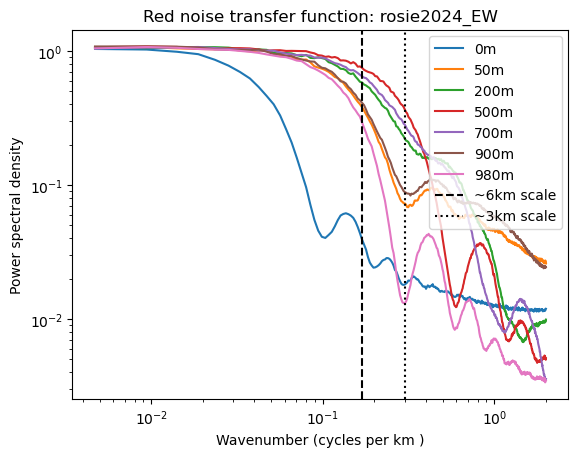

In [29]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(rosie2024_EW_transfer_functions.k, rosie2024_EW_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: rosie2024_EW')


 
plt.axvline(x=1.7e-1, c='black', label="~6km scale", ls='--')
plt.axvline(x=3e-1, c='black', label="~3km scale", ls=':')

axs.legend(loc='upper right')


WE

In [30]:
path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/good_files/'
file_correct_location = '/Users/Lauryn/THESIS/CPROOF_Work/Files/corrected_location/'


rosie2024_WE =  xr.open_dataset(path+'rosie2024_WE.nc')  
rosie2024_WE_grid =  xr.open_dataset(file_correct_location+'rosie2024_WE_corrected_dist.nc')  

In [58]:
fine_spectra_rosie2024_WE = np.empty((1100, 85, 1000))
fine_spectra_rosie2024_WE[:] = np.nan

for m in range(0,1000):
    print(m)
    #step 1: make white noise 
    white_noise_rosie2024_WE = xr.DataArray(np.random.randn(1100,int(((1421.1-121.5)*1000/100))), dims=('depth','time')) 
    distance_noise_grid_rosie2024_WE = xr.DataArray(np.linspace(121.5, 1421.1, int(((1421.1-121.5)*1000/100))), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


    #step 2: make red noise
    red_noise = np.empty((1100,int(((1421.1-121.5)*1000/100))))
    red_noise[:,:] = np.nan

    for i in range(0,1100):
        red_noise[i] = np.cumsum(white_noise_rosie2024_WE[i])

    # step 3: Welch method the finely gridded noise
    one_iteration_spectra = np.empty((1100, 85))
    one_iteration_spectra[:] = np.nan

    for j in range(0,1100):
        r_noise = red_noise[j]
        r_noise = r_noise[~np.isnan(r_noise)]
        if len(r_noise)> 0: 
            evenly_spaced_grid = np.arange(0,climate.distance[-1],0.25) ##spaced 0.25 km apart

            r_noise = np.interp(evenly_spaced_grid, distance_noise_grid_rosie2024_WE[j], r_noise)

            k_fine, psd_fine = signal.welch(r_noise, fs=1/0.25, window='hann', nperseg=169, noverlap=169 // 2)

            one_iteration_spectra[j, :] = psd_fine

    fine_spectra_rosie2024_WE[:,:,m] = one_iteration_spectra
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [59]:
## average the fine spectra 
fine_spectra_rosie2024_WE = xr.DataArray(fine_spectra_rosie2024_WE, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_rosie2024_WE  = fine_spectra_rosie2024_WE.mean(dim='iteration')


In [60]:
transfer_functions_smoothed = np.empty((1100, 84, 1000))
transfer_functions_smoothed[:] = np.nan
section = rosie2024_WE_grid
section = section.isel(time=slice(None, None, -1))

for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_rosie2024_WE = np.random.randn(1100, 12996)

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_rosie2024_WE, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_rosie2024_WE[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 84), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=169, noverlap=169//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_rosie2024_WE[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0


/opt/anaconda3/envs/eos431/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 169 is greater than input length  = 11, using nperseg = 11
  warnings.warn('nperseg = {0:d} is greater than input length '


ValueError: noverlap must be less than nperseg.

In [ ]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = rosie2024_WE_grid.depth
average_transfer['k'] = k_even_grid[1::]

#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'rosie2024_WE_transfer_functions.nc')


In [ ]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

rosie2024_WE_transfer_functions = xr.open_dataset(transfer_path+ 'rosie2024_WE_transfer_functions.nc')
rosie2024_WE_transfer_functions

In [ ]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(rosie2024_WE_transfer_functions.k, rosie2024_WE_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: rosie2024_WE')


 
plt.axvline(x=1.7e-1, c='black', label="~6km scale", ls='--')
plt.axvline(x=3e-1, c='black', label="~3km scale", ls=':')

axs.legend(loc='upper right')

# walle2019_dec_WE

In [3]:
walle2019_dec_WE =  xr.open_dataset(path+walle2019_dec[1])  
walle2019_dec_WE_grid =  xr.open_dataset(file_correct_location+walle2019_dec_grid[1])  

In [7]:

fine_spectra_walle2019_dec_WE = np.empty((1100, 426, 1000))
fine_spectra_walle2019_dec_WE[:] = np.nan

for m in range(0,1000):
    print(m)
    #step 1: make white noise 
    white_noise_walle2019_dec_WE = xr.DataArray(np.random.randn(1100,int(((1421.1-121.5)*1000/100))), dims=('depth','time')) 
    distance_noise_grid_walle2019_dec_WE = xr.DataArray(np.linspace(121.5, 1421.1, int(((1421.1-121.5)*1000/100))), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


    #step 2: make red noise
    red_noise = np.empty((1100,int(((1421.1-121.5)*1000/100))))
    red_noise[:,:] = np.nan

    for i in range(0,1100):
        red_noise[i] = np.cumsum(white_noise_walle2019_dec_WE[i])

    # step 3: Welch method the finely gridded noise
    one_iteration_spectra = np.empty((1100, 426))
    one_iteration_spectra[:] = np.nan

    for j in range(0,1100):
        r_noise = red_noise[j]
        r_noise = r_noise[~np.isnan(r_noise)]
        if len(r_noise)> 0: 
            evenly_spaced_grid = np.arange(0,climate.distance[-1],0.25) ##spaced 0.25 km apart

            r_noise = np.interp(evenly_spaced_grid, distance_noise_grid_walle2019_dec_WE[j], r_noise)

            k_fine, psd_fine = signal.welch(r_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)

            one_iteration_spectra[j, :] = psd_fine

    fine_spectra_walle2019_dec_WE[:,:,m] = one_iteration_spectra
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
## average the fine spectra 
fine_spectra_walle2019_dec_WE = xr.DataArray(fine_spectra_walle2019_dec_WE, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2019_dec_WE  = fine_spectra_walle2019_dec_WE.mean(dim='iteration')


In [12]:
##### WHITEN #### 

#### only look at one depth 

##flip since WE section
section = walle2019_dec_WE_grid
section = section.isel(time=slice(None, None, -1))


#step 1: make white noise 
white_noise_walle2019_dec_WE = xr.DataArray(np.random.randn(1100,int(((1421.1-121.5)*1000/100))), dims=('depth','time')) 
distance_noise_grid_walle2019_dec_WE = xr.DataArray(np.linspace(121.5, 1421.1, int(((1421.1-121.5)*1000/100))), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1

#step 2: make red noise
red_noise = np.empty((1100,int(((1421.1-121.5)*1000/100))))
red_noise[:,:] = np.nan

for i in range(0,1100):
    red_noise[i] = np.cumsum(white_noise_walle2019_dec_WE[i])

#step 3: put on same grid as glider
glider_noise = np.empty((1100,882))
glider_noise[:,:] = np.nan
glider_noise = xr.DataArray(glider_noise, dims=('depth','time'))

for i in range(0,1100): 
    good_indx = ~np.isnan(section.v_distance[i,:])
    new_x = section.v_distance[i,good_indx]

    if len(new_x) > 0: 
        noise_vals = red_noise[i]
        noise_x = distance_noise_grid_walle2019_dec_WE[i]

        glider_noise[i,good_indx] = np.interp(new_x,noise_x, noise_vals)

#step 4: finely grid     
evenly_spaced_grid = np.arange(0,climate.distance[-1],0.25) ##spaced 0.25 km apart

even_grid_noise = np.empty((len(section.depth), len(evenly_spaced_grid)))
even_grid_noise[:] = np.nan


for i in range(0,1100):
    good_indx = ~(np.isnan(section.potential_temperature[i,:]) ) 
    old_x = section.v_distance[i,good_indx]

    if len(old_x) >= 1: 
        noise = glider_noise[i,good_indx]
        even_grid_noise[i,:] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)


# Step 5: Welch method the finely gridded noise
transfer_functions = np.empty((1100, 425))
transfer_functions[:] = np.nan
    
for j in range(1100):
    even_noise = even_grid_noise[j]
    even_noise = even_noise[~np.isnan(even_noise)]
    if len(even_noise)> 0: 
        k_even_grid,psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2 )

            
        ##find transfer function
        transfer_functions[j, :] =  psd_even_grid[1::] / fine_spectra_walle2019_dec_WE[j][1::] 
            


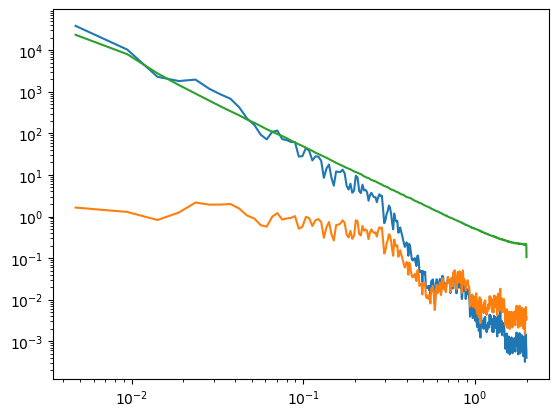

In [13]:
k_even_grid,psd_even_grid = signal.welch(even_grid_noise[500][~np.isnan(even_grid_noise[500])], fs=1/0.25, window='hann', nperseg=850, noverlap=850//2 )
plt.loglog(k_even_grid[1::],psd_even_grid[1::])

plt.plot(k_even_grid[1::],transfer_functions[500])

plt.plot(k_even_grid[1::],fine_spectra_walle2019_dec_WE[500,1::])

In [46]:
import numpy as np
import xarray as xr
from scipy import signal


transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2019_dec_WE_grid
section = section.isel(time=slice(None, None, -1))

for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2019_dec_WE = np.random.randn(1100, 12996)

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2019_dec_WE, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, 882), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2019_dec_WE[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2019_dec_WE[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [55]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2019_dec_WE_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [58]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2019_dec_WE_transfer_functions.nc')


In [59]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2019_dec_WE_transfer_functions = xr.open_dataset(transfer_path+ 'walle2019_dec_WE_transfer_functions.nc')
walle2019_dec_WE_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

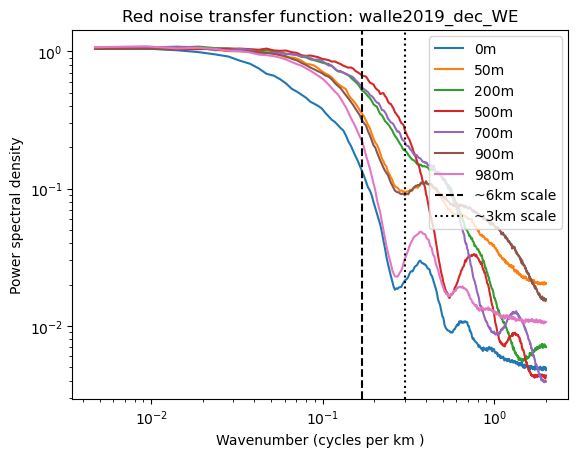

In [60]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(walle2019_dec_WE_transfer_functions.k, walle2019_dec_WE_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: walle2019_dec_WE')


 
plt.axvline(x=1.7e-1, c='black', label="~6km scale", ls='--')
plt.axvline(x=3e-1, c='black', label="~3km scale", ls=':')

axs.legend(loc='upper right')


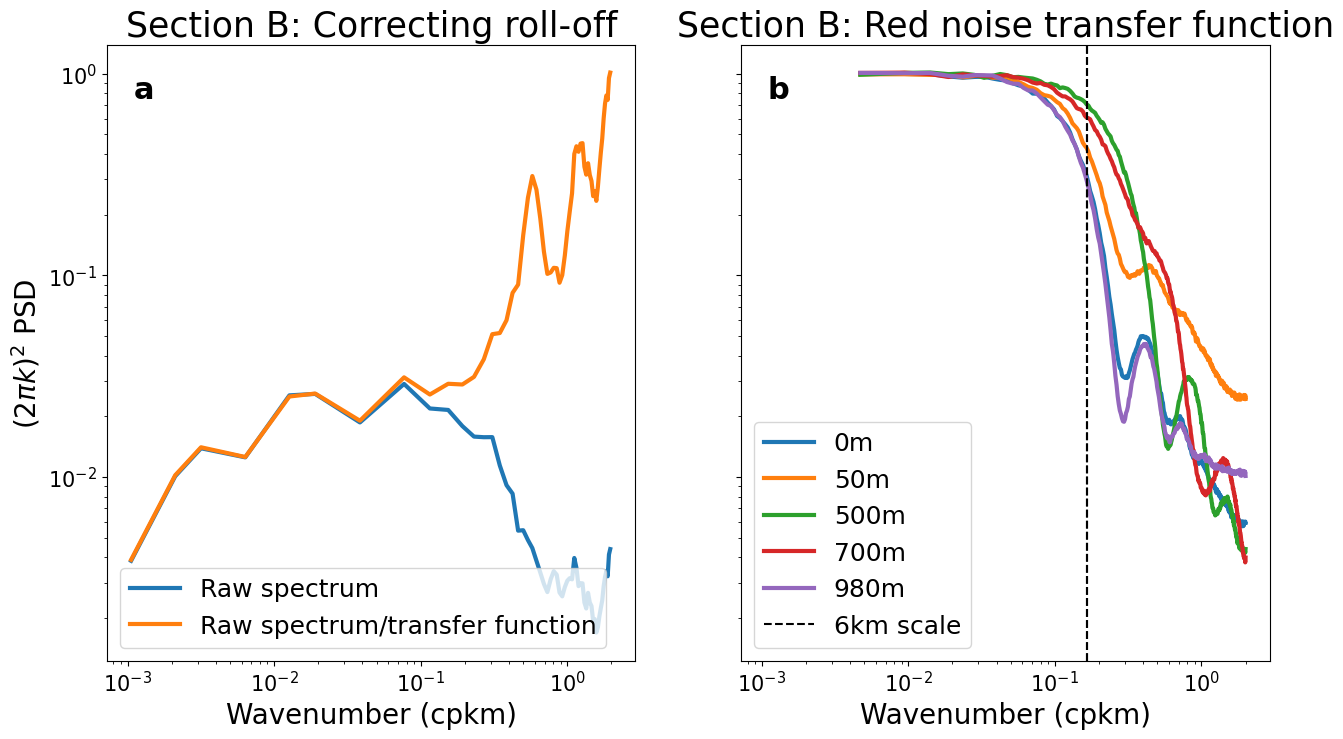

In [24]:
all_sections_combined = xr.open_dataset('/Users/Lauryn/THESIS/CPROOF_Work/Files/good_files/all_files_corrected.nc')
glider = all_sections_combined.isel(file=1)
section = glider.isel(distance=slice(None, None, -1))

 ### block average PSD
section_block = jmkxarray.multi_psd(((section.iso_temps-all_sections_combined.pot_temp_mean)/all_sections_combined.pot_temp_std).T, 
                                   minnfft=64, 
                            xdim='distance', ydim='depth', xunits='km', dataunits='C')



walle2019_dec_EW_transfer_functions = xr.open_dataset('/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/walle2019_dec_EW_transfer_functions.nc')
walle2019_dec_EW_transfer_functions

levels = [0,50,500,700,980]

fig, axs = plt.subplots(1,2, sharex=True,sharey=True, figsize=(15,8))

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs[1].loglog(walle2019_dec_EW_transfer_functions.k, walle2019_dec_EW_transfer_functions.transfer_fn[nn], linewidth = 3,label = label )
    

    
axs[1].set_xlabel('Wavenumber (cpkm)', fontsize=20)
axs[1].set_title('Section B: Red noise transfer function', fontsize=25)


 
axs[1].axvline(x=1/6, c='black', label="6km scale", ls='--')

axs[1].legend(loc='lower left', fontsize=18)
axs[1].tick_params(axis='y', labelsize=15)
axs[1].tick_params(axis='x', labelsize=15)


walle2019_dec_EW_transfer_functions = xr.open_dataset('/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/walle2019_dec_EW_transfer_functions.nc')

######

axs[0].loglog(section_block.kx,section_block.spectrum[500]*(2*np.pi*section_block.kx)**2, linewidth = 3 ,label='Raw spectrum')
 
transfer = np.interp(section_block.kx,walle2019_dec_EW_transfer_functions.k,
                              walle2019_dec_EW_transfer_functions.transfer_fn[500].values) 
axs[0].loglog(section_block.kx,section_block.spectrum[500]*(2*np.pi*section_block.kx)**2/transfer,linewidth = 3,label='Raw spectrum/transfer function')
    

    
axs[0].set_xlabel('Wavenumber (cpkm)', fontsize=20)
axs[0].set_ylabel(r'$(2 \pi k)^{2}$ PSD', fontsize=20)
axs[0].set_title('Section B: Correcting roll-off', fontsize=25)


 
plt.axvline(x=1/6, c='black', label="~6km scale", ls='--')

axs[0].legend(loc='lower left', fontsize=18)
axs[0].tick_params(axis='y', labelsize=15)
axs[0].tick_params(axis='x', labelsize=15)


labels = ['a', 'b', 'c', 'd','e','f']
for ax, label in zip(axs.flat, labels):

    ax.text(0.05, 0.95, label, transform=ax.transAxes,
            fontsize=22, fontweight='bold', va='top', ha='left',color='k')



plt.savefig("transfer.pdf", format="pdf", bbox_inches="tight")


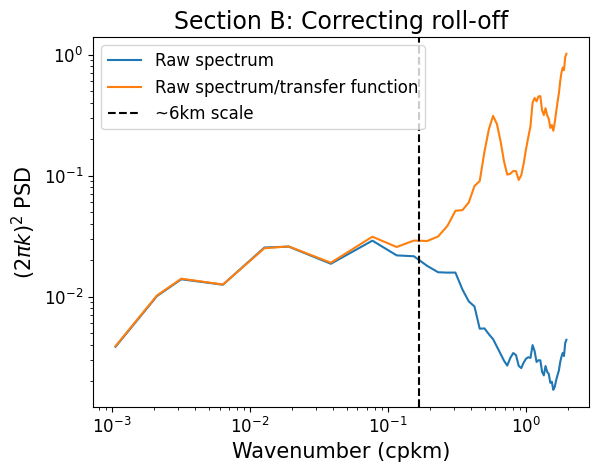

In [8]:
walle2019_dec_EW_transfer_functions = xr.open_dataset('/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/walle2019_dec_EW_transfer_functions.nc')


fig, axs = plt.subplots()

axs.loglog(section_block.kx,section_block.spectrum[500]*(2*np.pi*section_block.kx)**2, label='Raw spectrum')
 
transfer = np.interp(section_block.kx,walle2019_dec_EW_transfer_functions.k,
                              walle2019_dec_EW_transfer_functions.transfer_fn[500].values) 
axs.loglog(section_block.kx,section_block.spectrum[500]*(2*np.pi*section_block.kx)**2/transfer, label='Raw spectrum/transfer function')
    

    
axs.set_xlabel('Wavenumber (cpkm)', fontsize=15)
axs.set_ylabel(r'$(2 \pi k)^{2}$ PSD', fontsize=15)
axs.set_title('Section B: Correcting roll-off', fontsize=17)


 
plt.axvline(x=1/6, c='black', label="~6km scale", ls='--')

axs.legend(loc='upper left', fontsize=12)
axs.tick_params(axis='y', labelsize=12)
axs.tick_params(axis='x', labelsize=12)
 
plt.savefig("correcting-rolloff.pdf", format="pdf", bbox_inches="tight")


# walle2021_EW

In [62]:
path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/good_files/'

walle2021_EW =  xr.open_dataset(path+walle2021[0])  
walle2021_EW_grid =  xr.open_dataset(file_correct_location+walle2021_grid[0])

# Initialize the fine spectra array
fine_spectra_walle2021_EW = np.empty((1100, 426, 1000))
fine_spectra_walle2021_EW[:] = np.nan

# Static variables
distance_noise_grid_walle2021_EW = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_walle2021_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_walle2021_EW, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_walle2021_EW, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_walle2021_EW[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [79]:
## average the fine spectra 
fine_spectra_walle2021_EW = xr.DataArray(fine_spectra_walle2021_EW, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2021_EW  = fine_spectra_walle2021_EW.mean(dim='iteration')


In [80]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2021_EW_grid
distance_noise_grid_walle2021_EW = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2021_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2021_EW, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2021_EW[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2021_EW[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [81]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2021_EW_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [82]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2021_EW_transfer_functions.nc')


In [83]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2021_EW_transfer_functions = xr.open_dataset(transfer_path+ 'walle2021_EW_transfer_functions.nc')
walle2021_EW_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

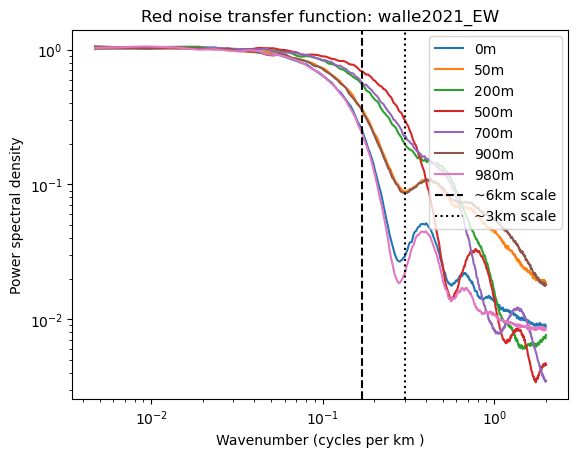

In [84]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(walle2021_EW_transfer_functions.k, walle2021_EW_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: walle2021_EW')


 
plt.axvline(x=1.7e-1, c='black', label="~6km scale", ls='--')
plt.axvline(x=3e-1, c='black', label="~3km scale", ls=':')

axs.legend(loc='upper right')

# Walle2021_WE

In [85]:
walle2021_WE =  xr.open_dataset(path+walle2021[1])  
walle2021_WE

<xarray.Dataset> Size: 428MB
Dimensions:                (depth: 1000, distance: 5347)
Coordinates:
  * depth                  (depth) float64 8kB 0.0 1.001 2.002 ... 999.0 1e+03
  * distance               (distance) float64 43kB 84.65 84.9 ... 1.421e+03
Data variables: (12/14)
    oxygen                 (depth, distance) float64 43MB ...
    potential_temperature  (depth, distance) float64 43MB ...
    salinity               (depth, distance) float64 43MB ...
    pressure               (depth, distance) float64 43MB ...
    longitude              (depth, distance) float64 43MB ...
    latitude               (depth, distance) float64 43MB ...
    ...                     ...
    mean_temp              (depth) float64 8kB ...
    var_temp               (depth) float64 8kB ...
    std_temp               (depth) float64 8kB ...
    pot_density            (depth, distance) float64 43MB ...
    iso_density            (depth, distance) float64 43MB ...
    iso_temps              (depth, distance) float64 43MB ...

In [86]:

walle2021_WE =  xr.open_dataset(path+walle2021[1])  
walle2021_WE_grid =  xr.open_dataset(file_correct_location+walle2021_grid[1])

# Initialize the fine spectra array
fine_spectra_walle2021_WE = np.empty((1100, 426, 1000))
fine_spectra_walle2021_WE[:] = np.nan

# Static variables
distance_noise_grid_walle2021_WE = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_walle2021_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_walle2021_WE, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_walle2021_WE, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_walle2021_WE[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [87]:
## average the fine spectra 
fine_spectra_walle2021_WE = xr.DataArray(fine_spectra_walle2021_WE, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2021_WE  = fine_spectra_walle2021_WE.mean(dim='iteration')


In [88]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2021_WE_grid
section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_walle2021_WE = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2021_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2021_WE, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2021_WE[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2021_WE[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [89]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2021_WE_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [90]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2021_WE_transfer_functions.nc')


In [93]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2021_WE_transfer_functions = xr.open_dataset(transfer_path+ 'walle2021_WE_transfer_functions.nc')
walle2021_WE_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

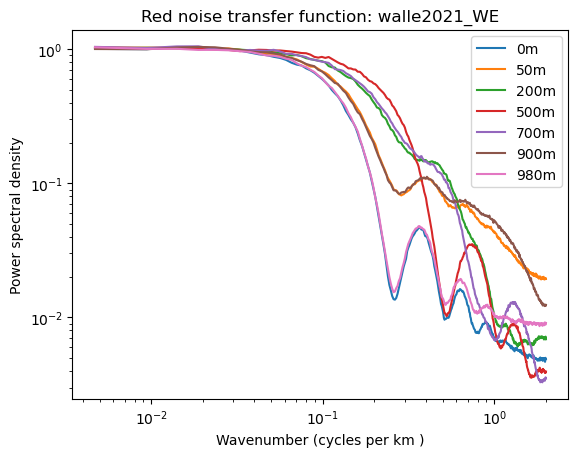

In [94]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(walle2021_WE_transfer_functions.k, walle2021_WE_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: walle2021_WE')



axs.legend(loc='upper right')

# Rosie2022_EW

In [95]:
rosie2022_EW =  xr.open_dataset(path+rosie2022[0]) 
rosie2022_EW

rosie2022_EW_grid =  xr.open_dataset(file_correct_location+rosie2022_grid[0])

In [97]:


# Initialize the fine spectra array
fine_spectra_rosie2022_EW = np.empty((1100, 426, 1000))
fine_spectra_rosie2022_EW[:] = np.nan

# Static variables
distance_noise_grid_rosie2022_EW = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_rosie2022_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_rosie2022_EW, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_rosie2022_EW, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_rosie2022_EW[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [99]:
## average the fine spectra 
fine_spectra_rosie2022_EW = xr.DataArray(fine_spectra_rosie2022_EW, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_rosie2022_EW  = fine_spectra_rosie2022_EW.mean(dim='iteration')


In [100]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = rosie2022_EW_grid
#section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_rosie2022_EW = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_rosie2022_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_rosie2022_EW, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_rosie2022_EW[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_rosie2022_EW[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [101]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = rosie2022_EW_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [102]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'rosie2022_EW_transfer_functions.nc')


In [103]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

rosie2022_EW_transfer_functions = xr.open_dataset(transfer_path+ 'rosie2022_EW_transfer_functions.nc')
rosie2022_EW_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

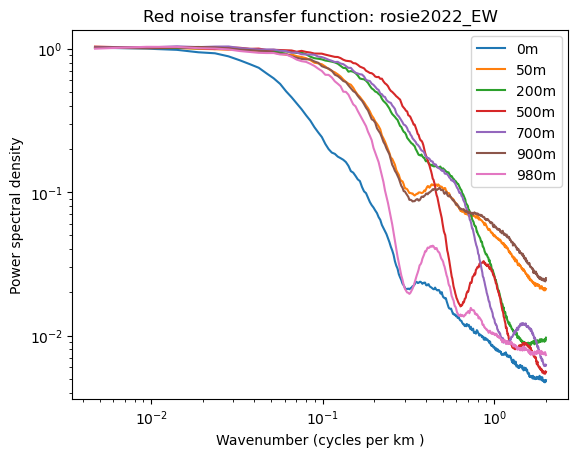

In [104]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(rosie2022_EW_transfer_functions.k, rosie2022_EW_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: rosie2022_EW')



axs.legend(loc='upper right')

# Rosie2022_WE

In [105]:
rosie2022_WE =  xr.open_dataset(path+rosie2022[1]) 

rosie2022_WE_grid =  xr.open_dataset(file_correct_location+rosie2022_grid[1])
rosie2022_WE

<xarray.Dataset> Size: 428MB
Dimensions:                (depth: 1000, distance: 5347)
Coordinates:
  * depth                  (depth) float64 8kB 0.0 1.001 2.002 ... 999.0 1e+03
  * distance               (distance) float64 43kB 84.65 84.9 ... 1.421e+03
Data variables: (12/14)
    oxygen                 (depth, distance) float64 43MB ...
    potential_temperature  (depth, distance) float64 43MB ...
    salinity               (depth, distance) float64 43MB ...
    pressure               (depth, distance) float64 43MB ...
    longitude              (depth, distance) float64 43MB ...
    latitude               (depth, distance) float64 43MB ...
    ...                     ...
    mean_temp              (depth) float64 8kB ...
    var_temp               (depth) float64 8kB ...
    std_temp               (depth) float64 8kB ...
    pot_density            (depth, distance) float64 43MB ...
    iso_density            (depth, distance) float64 43MB ...
    iso_temps              (depth, distance) float64 43MB ...

In [125]:
# Initialize the fine spectra array
fine_spectra_rosie2022_WE = np.empty((1100, 214, 1000))
fine_spectra_rosie2022_WE[:] = np.nan

# Static variables
distance_noise_grid_rosie2022_WE = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_rosie2022_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_rosie2022_WE, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_rosie2022_WE, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=426, noverlap=426 // 2, nfft=426)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_rosie2022_WE[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [126]:
## average the fine spectra 
fine_spectra_rosie2022_WE = xr.DataArray(fine_spectra_rosie2022_WE, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_rosie2022_WE  = fine_spectra_rosie2022_WE.mean(dim='iteration')


In [129]:
transfer_functions_smoothed = np.empty((1100, 213, 1000))
transfer_functions_smoothed[:] = np.nan

section = rosie2022_WE_grid
section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_rosie2022_WE = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_rosie2022_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_rosie2022_WE, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_rosie2022_WE[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 213), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann',nperseg=426, noverlap=426 // 2, nfft=426)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_rosie2022_WE[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [130]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = rosie2022_WE_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [131]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'rosie2022_WE_transfer_functions.nc')


In [132]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

rosie2022_WE_transfer_functions = xr.open_dataset(transfer_path+ 'rosie2022_WE_transfer_functions.nc')
rosie2022_WE_transfer_functions

<xarray.Dataset> Size: 2MB
Dimensions:      (depth: 1100, k: 213)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 2kB 0.00939 0.01878 0.02817 ... 1.981 1.991 2.0
Data variables:
    transfer_fn  (depth, k) float64 2MB ...

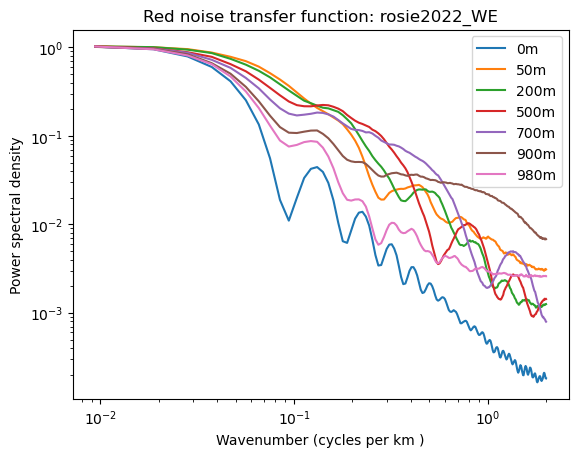

In [133]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(rosie2022_WE_transfer_functions.k, rosie2022_WE_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: rosie2022_WE')



axs.legend(loc='upper right')

# Rosie2023_EW

In [134]:
rosie2023_EW =  xr.open_dataset(path+rosie2023[0]) 
rosie2023_EW_grid =  xr.open_dataset(file_correct_location+rosie2023_grid[0])
rosie2023_EW

<xarray.Dataset> Size: 428MB
Dimensions:                (depth: 1000, distance: 5347)
Coordinates:
  * depth                  (depth) float64 8kB 0.0 1.001 2.002 ... 999.0 1e+03
  * distance               (distance) float64 43kB 84.65 84.9 ... 1.421e+03
Data variables: (12/14)
    oxygen                 (depth, distance) float64 43MB ...
    potential_temperature  (depth, distance) float64 43MB ...
    salinity               (depth, distance) float64 43MB ...
    pressure               (depth, distance) float64 43MB ...
    longitude              (depth, distance) float64 43MB ...
    latitude               (depth, distance) float64 43MB ...
    ...                     ...
    mean_temp              (depth) float64 8kB ...
    var_temp               (depth) float64 8kB ...
    std_temp               (depth) float64 8kB ...
    pot_density            (depth, distance) float64 43MB ...
    iso_density            (depth, distance) float64 43MB ...
    iso_temps              (depth, distance) float64 43MB ...

In [136]:
# Initialize the fine spectra array
fine_spectra_rosie2023_EW = np.empty((1100, 426, 1000))
fine_spectra_rosie2023_EW[:] = np.nan

# Static variables
distance_noise_grid_rosie2023_EW = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_rosie2023_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_rosie2023_EW, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_rosie2023_EW, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_rosie2023_EW[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [137]:
## average the fine spectra 
fine_spectra_rosie2023_EW = xr.DataArray(fine_spectra_rosie2023_EW, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_rosie2023_EW  = fine_spectra_rosie2023_EW.mean(dim='iteration')


In [138]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = rosie2023_EW_grid
#section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_rosie2023_EW = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_rosie2023_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_rosie2023_EW, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_rosie2023_EW[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_rosie2023_EW[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [139]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = rosie2023_EW_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [140]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'rosie2023_EW_transfer_functions.nc')


In [141]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

rosie2023_EW_transfer_functions = xr.open_dataset(transfer_path+ 'rosie2023_EW_transfer_functions.nc')
rosie2023_EW_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

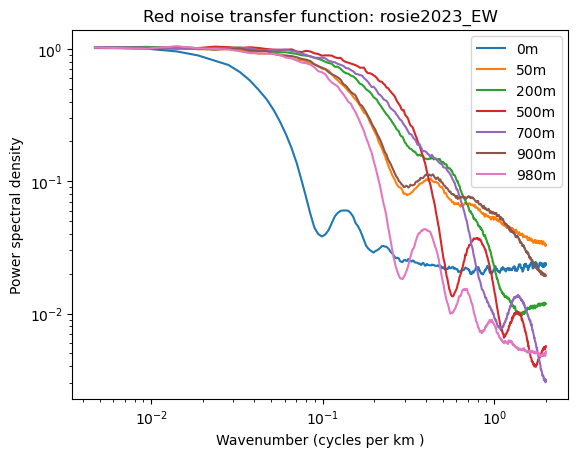

In [142]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(rosie2023_EW_transfer_functions.k, rosie2023_EW_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: rosie2023_EW')



axs.legend(loc='upper right')

# Rosie2023_WE

In [143]:
rosie2023_WE =  xr.open_dataset(path+rosie2023[1]) 
rosie2023_WE_grid =  xr.open_dataset(file_correct_location+rosie2023_grid[1])
rosie2023_WE

<xarray.Dataset> Size: 428MB
Dimensions:                (depth: 1000, distance: 5347)
Coordinates:
  * depth                  (depth) float64 8kB 0.0 1.001 2.002 ... 999.0 1e+03
  * distance               (distance) float64 43kB 84.65 84.9 ... 1.421e+03
Data variables: (12/14)
    oxygen                 (depth, distance) float64 43MB ...
    potential_temperature  (depth, distance) float64 43MB ...
    salinity               (depth, distance) float64 43MB ...
    pressure               (depth, distance) float64 43MB ...
    longitude              (depth, distance) float64 43MB ...
    latitude               (depth, distance) float64 43MB ...
    ...                     ...
    mean_temp              (depth) float64 8kB ...
    var_temp               (depth) float64 8kB ...
    std_temp               (depth) float64 8kB ...
    pot_density            (depth, distance) float64 43MB ...
    iso_density            (depth, distance) float64 43MB ...
    iso_temps              (depth, distance) float64 43MB ...

In [152]:
# Initialize the fine spectra array
fine_spectra_rosie2023_WE = np.empty((1100, 170, 1000))
fine_spectra_rosie2023_WE[:] = np.nan

# Static variables
distance_noise_grid_rosie2023_WE = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_rosie2023_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_rosie2023_WE, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_rosie2023_WE, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann',nperseg=338, noverlap=338 // 2, nfft=338)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_rosie2023_WE[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [153]:
## average the fine spectra 
fine_spectra_rosie2023_WE= xr.DataArray(fine_spectra_rosie2023_WE, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_rosie2023_WE  = fine_spectra_rosie2023_WE.mean(dim='iteration')


In [154]:
transfer_functions_smoothed = np.empty((1100, 169, 1000))
transfer_functions_smoothed[:] = np.nan
section = rosie2023_WE_grid
section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_rosie2023_WE = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_rosie2023_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_rosie2023_WE, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_rosie2023_WE[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 169), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann',nperseg=338, noverlap=338 // 2, nfft=338)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_rosie2023_WE[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [155]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = rosie2023_WE_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [156]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'rosie2023_WE_transfer_functions.nc')


In [157]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

rosie2023_WE_transfer_functions = xr.open_dataset(transfer_path+ 'rosie2023_WE_transfer_functions.nc')
rosie2023_WE_transfer_functions

<xarray.Dataset> Size: 1MB
Dimensions:      (depth: 1100, k: 169)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 1kB 0.01183 0.02367 0.0355 ... 1.976 1.988 2.0
Data variables:
    transfer_fn  (depth, k) float64 1MB ...

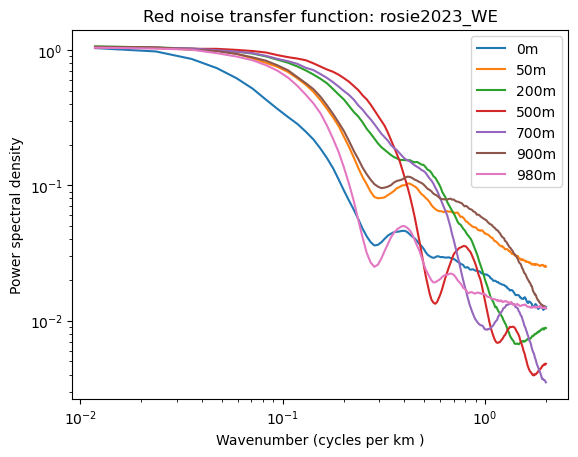

In [158]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(rosie2023_WE_transfer_functions.k, rosie2023_WE_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: rosie2023_WE')



axs.legend(loc='upper right')

# Walle2023_EW

In [159]:
walle2023_EW =  xr.open_dataset(path+walle2023[0]) 
walle2023_EW_grid =  xr.open_dataset(file_correct_location+walle2023_grid[0])
walle2023_EW

<xarray.Dataset> Size: 428MB
Dimensions:                (depth: 1000, distance: 5347)
Coordinates:
  * depth                  (depth) float64 8kB 0.0 1.001 2.002 ... 999.0 1e+03
  * distance               (distance) float64 43kB 84.65 84.9 ... 1.421e+03
Data variables: (12/14)
    oxygen                 (depth, distance) float64 43MB ...
    potential_temperature  (depth, distance) float64 43MB ...
    salinity               (depth, distance) float64 43MB ...
    pressure               (depth, distance) float64 43MB ...
    longitude              (depth, distance) float64 43MB ...
    latitude               (depth, distance) float64 43MB ...
    ...                     ...
    mean_temp              (depth) float64 8kB ...
    var_temp               (depth) float64 8kB ...
    std_temp               (depth) float64 8kB ...
    pot_density            (depth, distance) float64 43MB ...
    iso_density            (depth, distance) float64 43MB ...
    iso_temps              (depth, distance) float64 43MB ...

In [160]:
# Initialize the fine spectra array
fine_spectra_walle2023_EW = np.empty((1100, 426, 1000))
fine_spectra_walle2023_EW[:] = np.nan

# Static variables
distance_noise_grid_walle2023_EW = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_walle2023_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_walle2023_EW, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_walle2023_EW, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_walle2023_EW[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [161]:
## average the fine spectra 
fine_spectra_walle2023_EW = xr.DataArray(fine_spectra_walle2023_EW, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2023_EW  = fine_spectra_walle2023_EW.mean(dim='iteration')


In [162]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2023_EW_grid
#section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_walle2023_EW = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2023_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2023_EW, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2023_EW[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2023_EW[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [163]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2023_EW_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [164]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2023_EW_transfer_functions.nc')


In [165]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2023_EW_transfer_functions = xr.open_dataset(transfer_path+ 'walle2023_EW_transfer_functions.nc')
walle2023_EW_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

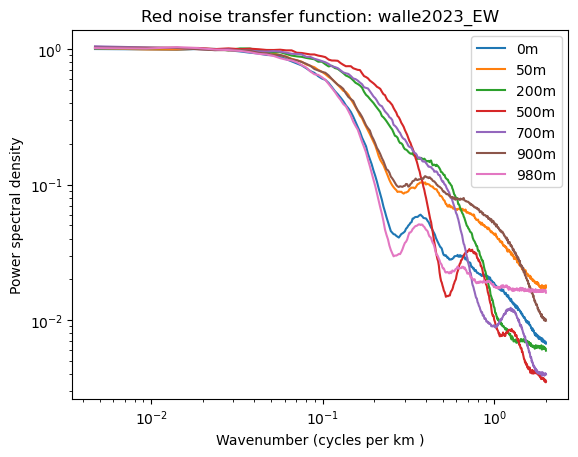

In [166]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(walle2023_EW_transfer_functions.k, walle2023_EW_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: walle2023_EW')



axs.legend(loc='upper right')

# Walle2023_WE

In [30]:
walle2023_WE =  xr.open_dataset(path+walle2023[1]) 
walle2023_WE_grid =  xr.open_dataset(file_correct_location+walle2023_grid[1])


In [22]:
# Initialize the fine spectra array
fine_spectra_walle2023_WE = np.empty((1100, 426, 1000))
fine_spectra_walle2023_WE[:] = np.nan

# Static variables
distance_noise_grid_walle2023_WE = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_walle2023_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_walle2023_WE, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_walle2023_WE, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_walle2023_WE[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
## average the fine spectra 
fine_spectra_walle2023_WE = xr.DataArray(fine_spectra_walle2023_WE, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2023_WE = fine_spectra_walle2023_WE.mean(dim='iteration')


In [39]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2023_WE_grid
section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_walle2023_WE = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2023_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2023_WE, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2023_WE[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2023_WE[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [40]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2023_WE_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [41]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2023_WE_transfer_functions.nc')


In [55]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2023_WE_transfer_functions = xr.open_dataset(transfer_path+ 'walle2023_WE_transfer_functions.nc')
walle2023_WE_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

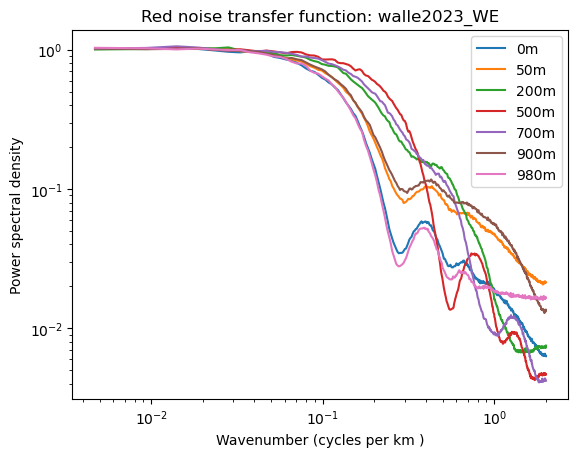

In [43]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(walle2023_WE_transfer_functions.k, walle2023_WE_transfer_functions.transfer_fn[nn], label = label )
    

    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: walle2023_WE')



axs.legend(loc='upper right')

# Walle2019_jul_EW

In [4]:
walle2019_jul_EW =  xr.open_dataset(path+walle2019_jul[0]) 
walle2019_jul_EW_grid =  xr.open_dataset(file_correct_location+walle2019_jul_grid[0])


In [6]:
# Initialize the fine spectra array
fine_spectra_walle2019_jul_EW = np.empty((1100, 426, 1000))
fine_spectra_walle2019_jul_EW[:] = np.nan

# Static variables
distance_noise_grid_walle2019_jul_EW = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_walle2019_jul_EW = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_walle2019_jul_EW, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_walle2019_jul_EW, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_walle2019_jul_EW[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
## average the fine spectra 
fine_spectra_walle2019_jul_EW = xr.DataArray(fine_spectra_walle2019_jul_EW, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2019_jul_EW = fine_spectra_walle2019_jul_EW.mean(dim='iteration')


In [8]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2019_jul_EW_grid
#section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_walle2019_jul_EW = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2023_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2019_jul_EW, axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~(np.isnan(section.potential_temperature[i,:]  ) |  np.isnan(section.v_distance[i,:]  )) 
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2019_jul_EW[i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2019_jul_EW[j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [9]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2019_jul_EW_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [10]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2019_jul_EW_transfer_functions.nc')


In [11]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2019_jul_EW_transfer_functions = xr.open_dataset(transfer_path+ 'walle2019_jul_EW_transfer_functions.nc')
walle2019_jul_EW_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...

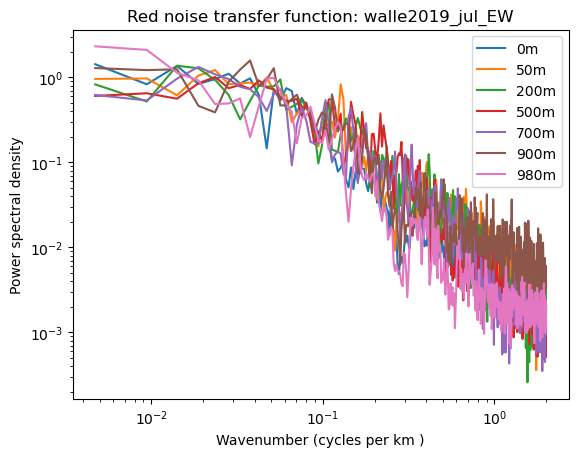

In [12]:
levels = [0,50,200,500,700,900,980]

fig, axs = plt.subplots()

for i,nn in enumerate(levels): 
    label = str(levels[i]) + 'm'
 
    
    axs.loglog(walle2019_jul_EW_transfer_functions.k, walle2019_jul_EW_transfer_functions.transfer_fn[nn], label = label )


    
axs.set_xlabel('Wavenumber (cycles per km )')
axs.set_ylabel('Power spectral density')
axs.set_title('Red noise transfer function: walle2019_jul_EW')



axs.legend(loc='upper right')

# Walle2019_jul_WE

In [4]:
walle2019_jul_WE =  xr.open_dataset(path+walle2019_jul[1]) 
walle2019_jul_WE_grid =  xr.open_dataset(file_correct_location+walle2019_jul_grid[1])


In [5]:
# Initialize the fine spectra array
fine_spectra_walle2019_jul_WE = np.empty((1100, 426, 1000))
fine_spectra_walle2019_jul_WE[:] = np.nan

# Static variables
distance_noise_grid_walle2019_jul_WE = np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10))

# Loop through each transfer function calculation
for m in range(1000):
    print(m)
    
    # Step 1: Generate white noise
    white_noise_walle2019_jul_WE = np.random.randn(1100, int((1421.1 - 84.7) * 10))
    
    # Step 2: Generate red noise using cumulative sum
    red_noise = np.cumsum(white_noise_walle2019_jul_WE, axis=1)
    
    # Step 3: Interpolate red noise to an evenly spaced grid and apply Welch method
    even_grid_noise = np.array([
        np.interp(np.arange(0, climate.distance[-1], 0.25), distance_noise_grid_walle2019_jul_WE, red_noise_row)
        for red_noise_row in red_noise
    ])
    
    one_iteration_spectra = np.array([
        signal.welch(noise_row, fs=1/0.25, window='hann', nperseg=850, noverlap=850 // 2)[1]
        for noise_row in even_grid_noise
    ])
    
    fine_spectra_walle2019_jul_WE[:, :, m] = one_iteration_spectra



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
## average the fine spectra 
fine_spectra_walle2019_jul_WE = xr.DataArray(fine_spectra_walle2019_jul_WE, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
fine_spectra_walle2019_jul_WE = fine_spectra_walle2019_jul_WE.mean(dim='iteration')


In [7]:
transfer_functions_smoothed = np.empty((1100, 425, 1000))
transfer_functions_smoothed[:] = np.nan
section = walle2019_jul_WE_grid
section = section.isel(time=slice(None, None, -1)) #only for WE sections 


distance_noise_grid_walle2019_jul_WE  = xr.DataArray(np.linspace(84.7, 1421.1, int((1421.1 - 84.7) * 10)), dims='time').expand_dims(dim={"depth": 1100}, axis=0)  #spacing in km from P1


for m in range(1000):
    print(m)

    # Step 1: Generate white noise
    white_noise_walle2019_jul_WE  = np.random.randn(1100, int((1421.1 - 84.7) * 10))

    # Step 2: Generate red noise
    red_noise = np.cumsum(white_noise_walle2019_jul_WE , axis=1)

    # Step 3: Interpolate red noise onto glider grid
    glider_noise = xr.DataArray(np.full((1100, len(section.v_distance[0])), np.nan), dims=('depth', 'time'))

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])
        new_x = section.v_distance[i, good_indx]

        if len(new_x) > 0:
            noise_vals = red_noise[i]
            noise_x = distance_noise_grid_walle2019_jul_WE [i]

            glider_noise[i, good_indx] = np.interp(new_x, noise_x, noise_vals)

    # Step 4: Interpolate glider noise onto even grid
    evenly_spaced_grid = np.arange(0, climate.distance[-1], 0.25)
    even_grid_noise = np.full((1100, len(evenly_spaced_grid)), np.nan)

    for i in range(1100):
        good_indx = ~np.isnan(section.v_distance[i, :])

        if np.sum(good_indx) >= 1:
            old_x = section.v_distance[i, good_indx]
            noise = glider_noise[i, good_indx]

            even_grid_noise[i, :] = np.interp(evenly_spaced_grid, old_x, noise, left=np.nan, right=np.nan)

    # Step 5: Compute Welch method for each depth
    transfer_functions = np.full((1100, 425), np.nan)

    for j in range(1100):
        even_noise = even_grid_noise[j]
        even_noise = even_noise[~np.isnan(even_noise)]

        if len(even_noise) > 0:
            k_even_grid, psd_even_grid = signal.welch(even_noise, fs=1/0.25, window='hann', nperseg=850, noverlap=850//2)
            transfer_functions[j, :] = psd_even_grid[1:] / fine_spectra_walle2019_jul_WE [j][1:]

    transfer_functions_smoothed[:, :, m] = transfer_functions


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
transfer_functions_smoothed = xr.DataArray(transfer_functions_smoothed, dims=('depth','k', 'iteration'))

### find transfer function at each depth by averaging 1000 transfer functions 
average_transfer  = transfer_functions_smoothed.mean(dim='iteration')
average_transfer = average_transfer.rename('transfer_fn')
average_transfer['depth'] = walle2019_jul_WE_grid.depth
average_transfer['k'] = k_even_grid[1::]


In [9]:
#Save transfer functions smoothed 
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

average_transfer.to_netcdf(transfer_path+ 'walle2019_jul_WE_transfer_functions.nc')


In [12]:
transfer_path = '/Users/Lauryn/THESIS/CPROOF_Work/Files/transfer_functions/'

walle2019_jul_WE_transfer_functions = xr.open_dataset(transfer_path+ 'walle2019_jul_WE_transfer_functions.nc')
walle2019_jul_WE_transfer_functions

<xarray.Dataset> Size: 4MB
Dimensions:      (depth: 1100, k: 425)
Coordinates:
  * depth        (depth) float64 9kB 0.5 1.5 2.5 ... 1.098e+03 1.098e+03 1.1e+03
  * k            (k) float64 3kB 0.004706 0.009412 0.01412 ... 1.991 1.995 2.0
Data variables:
    transfer_fn  (depth, k) float64 4MB ...